# Exercise set 3: 


**Learning Objectives:**

After completing this exercise set, you will be able to:

- Calculate effects from full and fractional factorial experimental designs.
- Create and interpret normal probability plots to assess the importance of effects.
- Create least squares models from experimental design results and use them to estimate effects.


**To get the exercise approved, complete the following problems:**

- [3.2(a)](#3.2(a)), [3.2(b)](#3.2(b)), and [3.2(c)](#3.2(c)): To show that you can analyse a full factorial design, including creating the normal probability plot.

- [3.3(b)](#3.3(b)) and [3.3(c)](#3.3(c)): To show that you can calculate effects from a fractional factorial design and create a least squares model.

In [1]:
import numpy as np

## Exercise 3.1

> **Note:** This problem is more of an example. The code given here will show you how to create a normal probability plot. Run the code, create the plot and interpret it.


After running a set of experiments, you determine the effects
given in the table below for 4 factors: A, B, C, and D:



| A    | B    | C     | D     | AB  | AC   | AD   | BC    | BD   | CD    | ABC   | ACD   | BCD   | ABCD  | ABD   |
|:-----|:-----|:------|:------|:----|:-----|:-----|:------|:-----|:------|:------|:------|:------|:------|:------|
| -8.0 | 24.0 | -2.25 | -5.50 | 1.0 | 0.75 | 0.00 | -1.25 | 4.50 | -0.25 | -0.75 | -0.25 | -0.75 | -0.25 | 0.50  |



**Task:** Use the example code below to create a normal probability plot. Interpret this plot and decide what the important effects are in this case.

In [2]:
# Example code to create a probability plot.

# We collect the effects from the table above:
import pandas as pd

effects = [
    ("A", -8.00),
    ("B", 24.00),
    ("C", -2.25),
    ("D", -5.50),
    ("AB", 1.00),
    ("AC", 0.75),
    ("AD", 0.00),
    ("BC", -1.25),
    ("BD", 4.50),
    ("CD", -0.25),
    ("ABC", -0.75),
    ("ACD", -0.25),
    ("BCD", -0.75),
    ("ABCD", -0.25),
    ("ABD", 0.50),
]
table1 = pd.DataFrame(effects, columns=["factor", "effect"])
table1.head()

,factor,effect
0,A,-8.00
1,B,24.00
2,C,-2.25
3,D,-5.50
4,AB,1.00


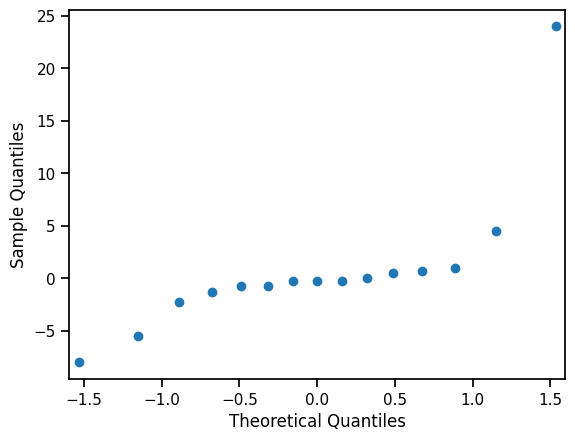

In [3]:
# We create the probability plot using statsmodels:
from matplotlib import pyplot as plt  # Needed for plotting
import seaborn as sns  # Used to style plots for a Jupyter Notebook
import statsmodels.api as sm  # Needed to create the probability plot

sns.set_context("notebook")

# Create the probability plot object using the "effect" column from table1.
# By default, ProbPlot compares the data to a standard normal distribution.
# This can also be selected by setting fit=False.
plot = sm.ProbPlot(table1["effect"], fit=False)

# Create a figure and an axes object. This allows for more control over the plot,
# such as setting axis labels, titles, and so on. fig represents the entire figure,
# while ax represents the specific axes where the plot will be drawn.
fig, ax = plt.subplots()

# Generate the plot and draw it on the specified axes (ax).
_ = plot.qqplot(ax=ax)

The plot above is somewhat hard to read since we do not see the names of the effects.
Let us try to make it easier to read by adding text showing the factor names:

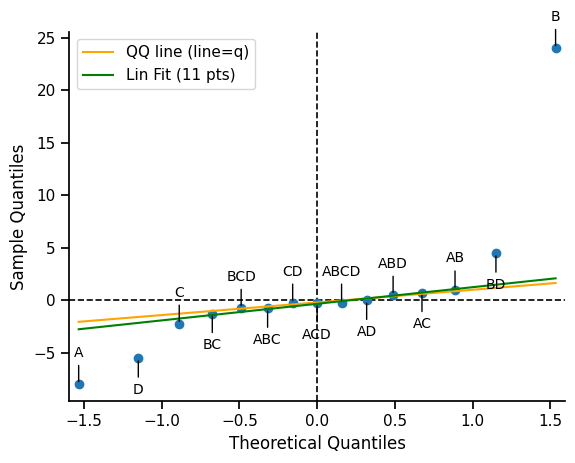

In [ ]:
# Create a new figure:
fig, ax = plt.subplots()

ax.axvline(0, color="black", linestyle="--", linewidth=1.2)  # Add a vertical line at x=0
ax.axhline(0, color="black", linestyle="--", linewidth=1.2)  # Add a horizontal line at y=0

plot = sm.ProbPlot(table1["effect"], fit=False)
qqplot = plot.qqplot(ax=ax, line="q")
# Extract the reference line from the qqplot and replot it to add label to legend 
qqplot_line = ax.get_lines()[-1]  # The last line is the reference line
qqplot_line.set_linestyle("") # Hide the line set by 'plot.qqplot', alt.: qqplot_line.set_linewidth()
ax.plot(qqplot_line.get_xdata(), qqplot_line.get_ydata(), label="QQ line (line=q)", color="orange", ls='-')

# Extract the theoretical and sample quantiles from the ProbPlot object.
# These will be used as the x and y coordinates for our scatter plot.
x = (
    plot.theoretical_quantiles
)  # Quantiles of the standard normal distribution.
y = plot.sample_quantiles  # Ordered (sorted) values of the 'effect' column.

# Get the factor names, sorted according to the 'effect' values.  This ensures
# the labels are placed correctly corresponding to the sorted effects on the plot.
sorted_factors = table1.sort_values("effect")

# Use the 11 smallest [i.e. 11 closest to y=0] points as the linear region:
idx = np.argsort(abs(y))
xin = x[idx[:11]]
yin = y[idx[:11]]
p = np.polyfit(xin, yin, deg=1)
line = np.polyval(p, x)
ax.plot(x, line, label="Lin Fit (11 pts)", color="green", ls='-')

# Add text labels to the plot, one for each data point.
# We iterate through the x (theoretical quantiles), y (sample quantiles), and
# factor names simultaneously using zip().
for i, (xi, yi, factor) in enumerate(zip(x, y, sorted_factors["factor"])):
    # Put the text slightly away from the points. Offset determines
    # how far away the points will be. You can experiment with values
    # different from 3.
    y_offset = 3 if i % 2 == 0 else -3 # Alternating offset to avoid overlap
    # Use annotate to show the text with a line connecting to the effect:
    ax.annotate(
        factor,  # Use the factor text
        (xi, yi),  # Point we are adding text to
        xytext=(
            xi,
            yi + y_offset,
        ),  # Shift the text along the y-axis to make it more visible
        ha="center",  # Center the text horizontally on the point
        va="center",  # Center the text vertically on the point
        arrowprops={
            "arrowstyle": "-"
        },  # Add a line connecting the text to the point
        fontsize="small",  # Make the font slightly smaller
    )

ax.legend()
sns.despine(fig=fig)

In plots like the one above, data from a normal distribution with a mean of zero and a variance $\sigma^2$ will tend to fall along a straight line passing through the origin, with a slope equal to $\sigma$. It is therefore helpful to add a reference line to the plot to aid in visual assessment.

When checking if numbers are from a standard normal distribution (with $\sigma = 1$), adding the line $x=y$ to the plot is common. This line represents the expected location of points from a standard normal distribution. In the code above this can be achieved by using the `line="45"` option:

```python
plot.qqplot(ax=ax, line="45")
```
In this case, fitting a line through the observed data points can be helpful. A challenge is that potential outliers (which might represent important effects) can influence the fitted line. `statsmodels` offers a robust option based on fitting through quartiles. This can be achieved using the `line="q"` option

```python
plot.qqplot(ax=ax, line="q")
```

In some cases, even `line="q"` might be affected by outliers. A second option is to **use your own judgment to identify the linear region** and potentially fit a line manually, excluding any obvious outliers. This visual inspection might be easier to perform on a plot without added annotations (effect names), as those can sometimes distract from the overall pattern.

#### Your answer to question 3.1: What are the important effects?

<span style="color:magenta"> 
The important effects are the ones that are NOT from a normal distribution, i.e., that does not fall on the straight line: 

- A 
- D 
- (C) 
- BD 
- B 

</span>

## Exercise 3.2

To optimize the filtration rate of a chemical product manufactured in a pressure
vessel, a 2⁴ factorial experiment was conducted in a pilot plant.
The experiment investigated the effects of temperature (A), pressure (B),
formaldehyde concentration (C), and stirring rate (D), each at two levels.

The goal was to determine how these factors influence filtration rate (volume filtered per unit time), aiming to maximize it for increased throughput and potentially lower costs.

Results from this experimental design can be found below:

In [90]:
import pandas as pd

data32 = {
    "A": [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1],
    "B": [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
    "C": [-1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1],
    "D": [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1],
    "Filtration Rate (L/hour)": [
        45,
        71,
        48,
        65,
        68,
        60,
        80,
        65,
        43,
        100,
        45,
        104,
        75,
        86,
        70,
        96,
    ],
}
table32 = pd.DataFrame(data32)
table32

,A,B,C,D,Filtration Rate (L/hour)
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


### 3.2(a)

Calculate all main effects and interaction effects (second-, third-, and fourth-order). 

In [91]:
from itertools import combinations

# Add interactions to the table 
# Make copy of table to add interactions before reponse 
filtration_rate = table32.copy(deep=True).drop(columns="Filtration Rate (L/hour)")

# Generate all interactions and loop over 
interactions = ["".join(comb) for r in range(2, 5) for comb in combinations(["A", "B", "C", "D"], r)] 
for interact in interactions: #"AB", "ABC", "ABCD", ... 
    #extract columns based on 'interact': col for col in "ABC" --> A, B, C
    #multiply the columns row-wise: np.pros(, axis=0)
    #add the product vector as new column: df[col] --> add column  
    filtration_rate[interact] = np.prod([filtration_rate[col] for col in interact], axis=0) 

# Readd the response column 
filtration_rate["Filtration Rate (L/hour)"] = table32["Filtration Rate (L/hour)"]
filtration_rate.head()

,A,B,C,D,AB,AC,AD,BC,BD,CD,ABC,ABD,ACD,BCD,ABCD,Filtration Rate (L/hour)
0,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1,45
1,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,71
2,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,-1,48
3,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,65
4,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1,68


In [107]:
#function to calculate the effect of factor 
def calc_effect(factor, df): 
    high_level = df.loc[df[factor]==1, "Filtration Rate (L/hour)"]
    low_level = df.loc[df[factor]==-1, "Filtration Rate (L/hour)"]
    effect = (high_level.sum() - low_level.sum()) / len(high_level)
    return effect 

# Calculate the main effects and interaction effects 
effects = {}
for factor in filtration_rate.columns[:-1]: 
    effect = calc_effect(factor, filtration_rate)
    effects[factor] = effect
effects = pd.DataFrame(data=effects.items(), columns=["factor", "effect"])
effects

,factor,effect
0,A,21.625
1,B,3.125
2,C,9.875
3,D,14.625
4,AB,0.125
5,AC,-18.125
6,AD,16.625
7,BC,2.375
8,BD,-0.375
9,CD,-1.125


#### Your answer to question 3.2(a): What are the calculated effects?

<span style="color:magenta"> 
See above table 
</span>

### 3.2(b)
Construct a normal probability plot and use it to identify the important effects.

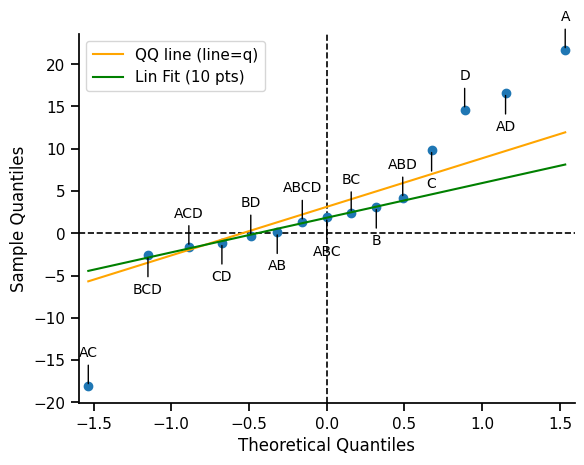

In [93]:
fig, ax = plt.subplots()

ax.axvline(0, color="black", linestyle="--", linewidth=1.2)  # Add a vertical line at x=0
ax.axhline(0, color="black", linestyle="--", linewidth=1.2)  # Add a horizontal line at y=0

plot = sm.ProbPlot(effects["effect"], fit=False)
qqplot = plot.qqplot(ax=ax, line="q")
# Extract the reference line from the qqplot and replot it to add label to legend 
qqplot_line = ax.get_lines()[-1] # The last line is the reference line
qqplot_line.set_linestyle("") # Hide the line set by 'plot.qqplot', alt.: qqplot_line.set_linewidth()
ax.plot(qqplot_line.get_xdata(), qqplot_line.get_ydata(), label="QQ line (line=q)", color="orange", ls='-')

# Extract the theoretical and sample quantiles from the ProbPlot object.
# These will be used as the x and y coordinates for our scatter plot.
x = (
    plot.theoretical_quantiles
) # Quantiles of the standard normal distribution.
y = plot.sample_quantiles # Ordered (sorted) values of the 'effect' column.

# Get the factor names, sorted according to the 'effect' values.  This ensures
# the labels are placed correctly corresponding to the sorted effects on the plot.
sorted_factors = effects.sort_values("effect")

# Use the 10 smallest [|closest| to y=0] points as the linear region:
idx = np.argsort(abs(y))
xin = x[idx[:10]]
yin = y[idx[:10]]
p = np.polyfit(xin, yin, deg=1)
line = np.polyval(p, x)
ax.plot(x, line, label="Lin Fit (10 pts)", color="green", ls='-')

# Add text labels to the plot, one for each data point.
for i, (xi, yi, factor) in enumerate(zip(x, y, sorted_factors["factor"])):
    y_offset = 4 if i % 2 == 0 else -4 # Alternating offset to avoid overlap
    # Use annotate to show the text with a line connecting to the effect:
    ax.annotate(
        factor,  # Use the factor text
        (xi, yi),  # Point we are adding text to
        xytext=(
            xi,
            yi + y_offset,
        ),  # Shift the text along the y-axis to make it more visible
        ha="center",  # Center the text horizontally on the point
        va="center",  # Center the text vertically on the point
        arrowprops={
            "arrowstyle": "-"
        },  # Add a line connecting the text to the point
        fontsize="small",  # Make the font slightly smaller
    )

ax.legend()
sns.despine(fig=fig)

#### Your answer to question 3.2(b): What are important effects?

<span style="color:magenta"> 
The important effects are the ones that are NOT from a normal distribution, i.e., that does not fall on the straight line: 

- AC
- (C) &nbsp; [formaldehyde concentration]
- D &nbsp;&nbsp;&nbsp; [stirring rate]
- AD
- A &nbsp;&nbsp;&nbsp; [temperature]

</span>

### 3.2(c)
Based on your results, at what level (high or low) should you put each of three factors A, C, and D to maximize the filtration rate?

In [108]:
effects.loc[effects["factor"].isin(["AC", "C", "D", "AD", "A"]),:]

,factor,effect
0,A,21.625
2,C,9.875
3,D,14.625
5,AC,-18.125
6,AD,16.625


In [109]:
# how is filt. rate for {A high, C low, D high} compared to the average and max filtration rate?
cond = (table32["A"]==1) & (table32["C"]==-1) & (table32["D"]==1)
table32.loc[cond, "Filtration Rate (L/hour)"] / table32.loc[:, "Filtration Rate (L/hour)"].mean()
table32.loc[cond, "Filtration Rate (L/hour)"] / table32.loc[:, "Filtration Rate (L/hour)"].max()

9     0.961538
11    1.000000
Name: Filtration Rate (L/hour), dtype: float64

#### Your answer to question 3.2(c): How should you set the factors A, C, and D?

<span style="color magenta">

- A *high*
- C *low*
- D *high*

</span>


## Exercise 3.3

Reconsider the experiment described in [Exercise 3.2](#Exercise-3.2). Due to limited resources, we can only do 8 runs. We will therefore use a $2^{4-1}$ fractional factorial design. We select the following generator: $D=ABC$.

**Confounding**: Loosing the ability to distinguish between the contributions from different effects. The reason for this is an insufficient number of experiments. 

**Defining contrast**: An equation used to determine what effects are confounded. A design might give rise to multiple defining contrasts.

**Generator**: Equations telling us how to relate effects which are confounded. These equations are used to “fill out” the missing columns in
a fractional factorial design matrix

### 3.3(a)

Find the defining contrast and resolution of this design.  Are any main effects aliased with two-factor interactions?

#### Your answer to question 3.3(a): What is the resolution and are any main effects aliased with two-factor interactions?

*Double click here*

$
\begin{align}
    D &= ABC \\ 
    D \cdot D &= ABCD \\ 
    1 &= ABCD \hspace{2cm} \text{This is the \textit{defining contrast}} \\
\end{align}
$

<span style="color:magenta"> Answer1: </span>
We can **not** get the *defining contrast* on the form $\{A, B, C, D\} = XY$, where $X,Y = \{A,B,C,D\}$. This means that **no** main effects are aliased with two-factor interactions. 

<span style="color:magenta"> Answer2: </span>
**Resolution** = "length of the shortest *defining contrast*". Stated otherwise, a design with resolution $R$ means a $p$ factor interaction will be confounded with other $R − p$ factor interactions or higher. 

In this case $R = IV$ and we have a $2^{4-1} (IV)$ design. For this design, the main effects ($p=1$) will be cofounded with $4-1=3$ order interactions, i.e., no two-factor interactions. 

### 3.3(b)
The results of a fractional factorial experiment are shown below.
Verify that $D = ABC$ and add columns for the interaction effects $AB$, $AC$, and $BC$ to the table.

In [117]:
import pandas as pd

data33 = {
    "Run": [1, 2, 3, 4, 5, 6, 7, 8],
    "A": [-1, 1, -1, 1, -1, 1, -1, 1],
    "B": [-1, -1, 1, 1, -1, -1, 1, 1],
    "C": [-1, -1, -1, -1, 1, 1, 1, 1],
    "D": [-1, 1, 1, -1, 1, -1, -1, 1],
    "Filtration Rate (L/hour)": [45, 100, 45, 65, 75, 60, 80, 96],
}

table33 = pd.DataFrame(data33)
table33

,Run,A,B,C,D,Filtration Rate (L/hour)
0,1,-1,-1,-1,-1,45
1,2,1,-1,-1,1,100
2,3,-1,1,-1,1,45
3,4,1,1,-1,-1,65
4,5,-1,-1,1,1,75
5,6,1,-1,1,-1,60
6,7,-1,1,1,-1,80
7,8,1,1,1,1,96


In [118]:
# Your code here
# Check that D = A*B*C
print(
    "D ?= A*B*C \t", 
    ( np.prod([table33[col] for col in ["A","B","C"]], axis=0) == table33["D"] ).all()
)

interactions = ["".join(comb) for r in range(2, 3) for comb in combinations(["A","B","C"], r)] 
for interact in interactions: 
    table33.insert(loc=len(table33.columns)-1, column=interact, value=np.prod([table33[col] for col in interact], axis=0))
table33

D ?= A*B*C 	 True


,Run,A,B,C,D,AB,AC,BC,Filtration Rate (L/hour)
0,1,-1,-1,-1,-1,1,1,1,45
1,2,1,-1,-1,1,-1,-1,1,100
2,3,-1,1,-1,1,-1,1,-1,45
3,4,1,1,-1,-1,1,-1,-1,65
4,5,-1,-1,1,1,1,-1,-1,75
5,6,1,-1,1,-1,-1,1,-1,60
6,7,-1,1,1,-1,-1,-1,1,80
7,8,1,1,1,1,1,1,1,96


#### Your answer to question 3.3(b): Is $D=ABC$?

<span style="color:magenta"> YES </span>

### 3.3(c)
Calculate all effects ($A$, $B$, $C$, $AB$, $AC$, $BC$, and $D=ABC$). Do this by creating a least squares model, for instance, using [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) or [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

In [194]:
# Your code here
X = table33.drop(columns=["Run", "Filtration Rate (L/hour)"])
X.insert(0, "b0", np.ones(len(X), dtype="int")) # Add intercept column
y = table33["Filtration Rate (L/hour)"]

# Linear regression using normal equations 
b_linalg = np.linalg.inv(X.T @ X) @ X.T @ y 

# Linear regression using scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model     = LinearRegression(fit_intercept=True)
X1        = X.to_numpy() #.reshape(-1, 1)
model.fit(X1, y)
y_hat     = model.predict(X1)
r2_linreg = r2_score(y, y_hat)
b_linreg  = np.append(model.intercept_, model.coef_)
print(f"R^2 (LinReg): {r2_linreg}")

# Linear regression using statsmodels
import statsmodels.api as sm 
X2         = sm.add_constant(X)
model      = sm.OLS(y, X2)
results    = model.fit()
b_linreg2  = results.params
r2_linreg2 = results.rsquared
print(f"R^2 (LinReg2): {r2_linreg2}")

# Combine results into dataframe 
# First calculate effects from design matrix and initialize dataframe 
effects = {}
for factor in table33.columns[1:-1]: 
    effect = calc_effect(factor, table33)
    effects[factor] = effect
effects = pd.DataFrame(data=effects.items(), columns=["factor", "effect"])
# Add coefficients from linear regression, using that "lin reg coeff" = (1/2) * "effect" 
effects["linalg effect"] = b_linalg[1:].values *2
effects["linreg effect"] = b_linreg[2:] *2 
effects["linreg2 effect"] = b_linreg2[1:].values *2
effects

R^2 (LinReg): 1.0
R^2 (LinReg2): 1.0


,factor,effect,linalg effect,linreg effect,linreg2 effect
0,A,19.0,19.0,19.0,19.0
1,B,1.5,1.5,1.5,1.5
2,C,14.0,14.0,14.0,14.0
3,D,16.5,16.5,16.5,16.5
4,AB,-1.0,-1.0,-1.0,-1.0
5,AC,-18.5,-18.5,-18.5,-18.5
6,BC,19.0,19.0,19.0,19.0


#### Your answer to question 3.3(c): What are the effects you calculated?

<span style="color:magenta">
See above table 
</span>

### 3.3(d)

Identify the unimportant effect(s) based on their calculated values.  Confirm their insignificance by fitting a new least squares model without the unimportant effects. (Removing the unimportant effects should not change $R^2$  significantly.)

In [166]:
# Your code here
effects_abs = effects.drop(columns="factor").abs().sort_values(by="effect", ascending=False)
effects_abs.insert(0, "factor", effects["factor"])
effects_abs

,factor,effect,linalg effect,linreg effect,linreg2 effect
0,A,19.0,19.0,19.0,19.0
6,BC,19.0,19.0,19.0,19.0
5,AC,18.5,18.5,18.5,18.5
3,D,16.5,16.5,16.5,16.5
2,C,14.0,14.0,14.0,14.0
1,B,1.5,1.5,1.5,1.5
4,AB,1.0,1.0,1.0,1.0


In [199]:
table33_sub = table33.drop(columns=["AB", "B"])

X_sub = table33_sub.drop(columns=["Run", "Filtration Rate (L/hour)"])
X_sub.insert(0, "b0", np.ones(len(X_sub), dtype="int")) # Add intercept column
y_sub = table33_sub["Filtration Rate (L/hour)"]

# Linear regression using scikit-learn 
model     = LinearRegression(fit_intercept=True)
X1_sub    = X_sub.to_numpy() 
model.fit(X1_sub, y_sub)
y_hat_sub = model.predict(X1_sub)
r2_linreg_sub = r2_score(y_sub, y_hat_sub)
b_linreg_sub  = np.append(model.intercept_, model.coef_)
print(f"R^2 (LinReg sub): {r2_linreg_sub}")

R^2 (LinReg sub): 0.9978837701448804


#### Your answer to question 3.3(d): What are the unimportant effects?

<span style="color:magenta">
The unimportant effects are 

- AB 
- B 

If C is also added as unimportant, R^2 changes significantly. 
</span>

## Exercise 3.4

[Teixeira et al. (2018)](https://doi.org/10.1016/j.scitotenv.2018.07.204) investigated the removal of two antibiotics from water using walnut shell-based activated carbon and a Box-Behnken experimental design. Their study examined the effects of pH, temperature (T), and initial antibiotic concentration (C) on antibiotic removal (measured as mg of antibiotic adsorbed per gram of activated carbon).

We will investigate if we can reproduce their results for one of the antibiotics, [Sulfamethoxazole](https://en.wikipedia.org/wiki/Sulfamethoxazole), namely that the optimal conditions for removal of Sulfamethoxazole are obtained at a temperature of 30 °C, initial concentration of 40 mg/L and a pH value of 5.5.

**Task:** Create a linear regression model using the provided experimental data (see [antibiotic.csv](./antibiotic.csv)) to predict the conditions (pH, T, and C) that maximize the removal of Sulfamethoxazole from water. The data includes measurements of Sulfamethoxazole adsorption (mg/g) at various pH (ranging from 2 to 8), temperature (ranging from 10 to 30 °C), and initial concentration (ranging from 20 to 40 mg/L) levels.

The linear model should include all main effects, all second-order main effects, and all interaction effects. That is, your model for the adsorption of the antibiotic ($y$) should be of the form: 

$y = b_0 + \sum_i b_i x_i + \sum_i b_{ii} x_i^2 + \sum_{i <j} b_{ij} x_i x_j$

where $x_i$ represents one of the factors (pH, T, or C).


**Suggested steps:**
1. Load the data using [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
2. Generate terms needed for the linear model using scikit-learn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
3. Fit the linear regression model using [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) or [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Evaluate the model's performance by calculating $R²$.
4. Identify the conditions (pH, T, and C) that maximize Sulfamethoxazole removal within the experimental region.  This can be done by using methods from [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html), for instance [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (you can maximize $y$ by minimizing $-y$).

In [266]:
# To load the raw data:
import pandas as pd

data = pd.read_csv("antibiotic.csv")
display(data.head())

,pH,T (°C),C (mg/L),x1,x2,x3,Sulfamethoxazole (mg/g)
0,2,10,30,-1,-1,0,57.2
1,2,10,30,-1,-1,0,54.9
2,2,10,30,-1,-1,0,54.3
3,2,20,20,-1,0,-1,63.0
4,2,20,20,-1,0,-1,60.3


The raw data is provided in the following format:

|    |   pH |   T (°C) |   C (mg/L) |   x1 |   x2 |   x3 |   Sulfamethoxazole (mg/g) |
|---:|-----:|---------:|-----------:|-----:|-----:|-----:|--------------------------:|
|  0 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      57.2 |
|  1 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      54.9 |
|  2 |    2 |       10 |         30 |   -1 |   -1 |    0 |                      54.3 |

Where the columns are:

*   **pH:**  The pH of the solution.
*   **T (°C):** The temperature of the solution in degrees Celsius.
*   **C (mg/L):** The initial concentration of Sulfamethoxazole in mg/L.
*   **x1:** The pH value scaled to the range [-1, 1] using the formula:  `x1 = (pH - 5) / 3`
*   **x2:** The temperature scaled to the range [-1, 1] using the formula: `x2 = (T - 20) / 10`
*   **x3:** The initial concentration scaled to the range [-1, 1] using the formula: `x3 = (C - 30) / 10`
*   **Sulfamethoxazole (mg/g):** The amount of Sulfamethoxazole adsorbed per gram of activated carbon, measured in mg/g.


In [320]:
def scaled2real(params):
    pH_s, T_s, C_s = params 
    
    pH_r = 3*pH_s+5
    T_r  = 10*T_s+20
    C_r  = 10*C_s+30
    return [pH_r, T_r, C_r]  

def real2scaled(params):
    pH_r, T_r, C_r = params 
    
    pH_s = (pH_r-5)/3
    T_s  = (T_r-20)/10
    C_s  = (C_r-30)/10
    return [pH_s, T_s, C_s]  

# Your code here
data.rename(columns={#pH OK 
                     "T (°C)":"T", 
                     "C (mg/L)":"C", 
                     "Sulfamethoxazole (mg/g)":"SMX", 
                     #"x1":"a", "x2":"b", "x3":"c"
                     }, 
                     inplace=True)
display(data.head())

,pH,T,C,x1,x2,x3,SMX
0,2,10,30,-1,-1,0,57.2
1,2,10,30,-1,-1,0,54.9
2,2,10,30,-1,-1,0,54.3
3,2,20,20,-1,0,-1,63.0
4,2,20,20,-1,0,-1,60.3


In [321]:

#def make_poly_thing(x, drop_cols, poly): 
#    X_new = pd.DataFrame(poly.transform(x), columns=poly.get_feature_names_out()) 
#    if drop_cols != None: x = x.drop(columns=drop_cols)
#
#    return X_new
#
#drop_cols = ["x1 x2", "x1 x3"]
#feature_names = poly.get_feature_names_out()
#np.where(np.isin(feature_names, drop_cols))[0]

In [332]:
from sklearn.preprocessing import PolynomialFeatures

x = data.drop(columns=["pH","T","C","SMX"])
y = data["SMX"] 
Y = y.values 

poly = PolynomialFeatures(degree=2, include_bias=True) 
X = pd.DataFrame(poly.fit_transform(x), columns=poly.get_feature_names_out()) 

feature_names = poly.get_feature_names_out()
drop_cols = ["x1 x2", "x1 x3"]
if drop_cols != None: 
    X = X.drop(columns=drop_cols) 
    feature_names = [val for val in feature_names if val not in drop_cols]
X.head() 

,1,x1,x2,x3,x1^2,x2^2,x2 x3,x3^2
0,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,0.0
1,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,0.0
2,1.0,-1.0,-1.0,0.0,1.0,1.0,-0.0,0.0
3,1.0,-1.0,0.0,-1.0,1.0,0.0,-0.0,1.0
4,1.0,-1.0,0.0,-1.0,1.0,0.0,-0.0,1.0


In [338]:
import statsmodels.api as sm 

model   = sm.OLS(Y, X).fit()
b       = model.params
r2      = model.rsquared

print(f"R^2 (LinReg2): {r2}")
print(model.summary())

R^2 (LinReg2): 0.9136956318944041
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     51.42
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           3.02e-16
Time:                        19:05:56   Log-Likelihood:                -118.20
No. Observations:                  42   AIC:                             252.4
Df Residuals:                      34   BIC:                             266.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             92.1

In [347]:
from scipy.optimize import minimize 


def objective(params): 
    x1, x2, x3 = params #pH, T, C

    # !!! Note that the order in x_new must match the order 
    #  in "poly.get_feature_names_out()" and "results.summary()" !!!
    #  This is here previously globally defined as "feature_names", 
    #  as some columns can be chosen to be dropped 
    feature_values = {
        '1':1,
        'x1':x1, 'x2':x2, 'x3':x3,
        'x1^2':x1**2, 
        'x1 x2':x1*x2,
        'x1 x3':x1*x3,
        'x2^2':x2**2, 
        'x2 x3':x2*x3, 
        'x3^2':x3**2
    }
    x_new = np.array([feature_values[name] for name in feature_names]) 

    y_pred = model.predict(x_new) 
    return -y_pred # Negative because we want to maximize y

x0 = real2scaled([5.5, 30, 40]) #initial guess for pH, T, C [in scaled units]
bounds = [(-1,1) for _ in range(len(x0))] #bounds for pH, T, C [in scaled units]

res = minimize(objective, x0, bounds=bounds, method="trust-constr") 
optimal_conditions = res.x 

pH_opt, T_opt, C_opt = scaled2real(optimal_conditions) 
print("Optmized Parameters Found:")
print(f"pH: {pH_opt:.2f} \n T: {T_opt:.2f} °C \n C: {C_opt:.2f} mg/L")

Optmized Parameters Found:
pH: 5.50 
 T: 30.00 °C 
 C: 40.00 mg/L


#### Your answer to question 3.4: What settings gives you optimum absorbance?

*Double click here*